In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

In [3]:
literacy = pd.read_csv(r"C:\Users\yeshw\Downloads\literacy.csv")
print(literacy.head(10))

     Year   Rural Unnamed: 2 Unnamed: 3   Urban Unnamed: 5 Unnamed: 6  \
0     NaN  Female       male      Total  Female       male      Total   
1  1951.0    4.87      19.02       12.1   22.33       45.6      34.59   
2  1961.0    10.1       34.3       22.5    40.5         66       54.4   
3  1971.0    15.5       48.6       27.9    48.8       69.8       60.2   
4  1981.0    21.7       49.6         36    56.3       76.7       67.2   
5  1991.0   30.17      56.96         36   64.05      81.09       67.2   
6  2001.0    46.7       71.4       59.4    73.2       86.7       80.3   
7  2011.0   57.93      77.15      66.77   79.11      88.76      84.11   

  Combined Unnamed: 8 Unnamed: 9  
0   Female       male      Total  
1     8.86      27.15      18.32  
2    15.35       40.4      28.31  
3    21.97      45.96      34.45  
4    29.76      56.83      43.57  
5    39.29      64.13      52.21  
6    53.67      75.26      64.83  
7    64.63      80.88      72.98  


In [4]:
# extracting the male and female combined data
female = pd.to_numeric(literacy.loc[1:,'Combined'])
male = pd.to_numeric(literacy.loc[1:,'Unnamed: 8'])
year = pd.to_numeric(literacy.loc[1:,'Year'])

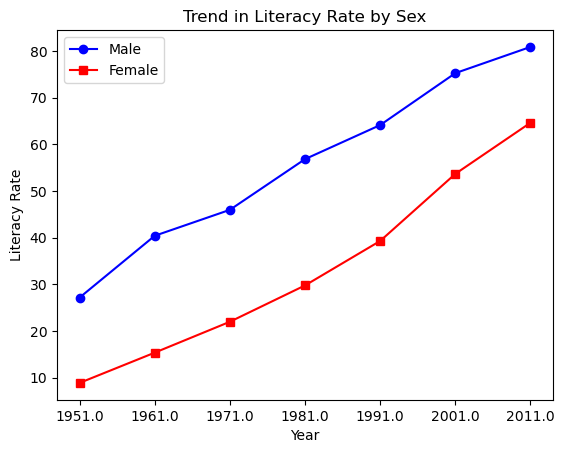

In [5]:
# plotting the data 
male.plot(kind = 'line', marker = 'o',color = 'b', label = 'Male')
female.plot(kind = 'line', marker = 's', color='r', label = 'Female')
plt.xticks([tick + 1 for tick in range(len(year))],year)
plt.xlabel('Year')
plt.ylabel('Literacy Rate')
plt.title('Trend in Literacy Rate by Sex')
plt.legend()

In [6]:
file = pd.read_csv(r"C:\Users\yeshw\Downloads\lit_regress.csv")
print(file)

      Year   gdp   exp    lit
0  1951-52  2.90  0.64  18.32
1  1960-61  3.72  1.48  28.31
2  1970-71  4.03  2.11  34.45
3  1980-81  3.08  2.98  43.57
4  1990-91  5.57  3.84  52.21
5  2000-01  5.60  4.14  64.83
6  2011-12  6.75  3.88  72.98


In [7]:
regression = ols('gdp ~ exp + lit', data = file).fit()
estimated = regression.predict()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     9.122
Date:                Sat, 12 Aug 2023   Prob (F-statistic):             0.0323
Time:                        01:06:48   Log-Likelihood:                -6.0451
No. Observations:                   7   AIC:                             18.09
Df Residuals:                       4   BIC:                             17.93
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4549      0.774      1.880      0.1

C:\Users\yeshw\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Test for Heteroskedasticity


In [9]:
#bp test 
bp = ols('resid2 ~  exp + lit ', data = file).fit()
bp_value = round(bp.f_pvalue, 5)
if bp_value > 0.05:
    print(f"BP Test : {bp_value} - Homoskedasticity")
else:
    print(f"BP Test : {bp_value} - Heteroskedasticity")

BP Test : 0.34325 - Homoskedasticity


### Test for Auto-correlation

In [10]:
# Breusch-Godfrey Serial Correlation LM test 
from statsmodels.stats.diagnostic import acorr_breusch_godfrey as lm 
test = lm(regression, nlags = 2)
result = test[3]
if result > 0.05:
    print(f"No auto-correlation: {result}")
else:
    print(f"auto-correlation: {result}")

No auto-correlation: 0.27476046013171035


### Test for Multi-collinearity 

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = file.loc[:,'gdp':'lit']
x =x.drop(['gdp'], axis = 1)
x_centered = x - x.mean()
vif = pd.DataFrame()
vif['Features'] = x.columns 
vif['VIF'] = [variance_inflation_factor(x_centered.values, i)
             for i in range(len(x.columns))]
high_vif = vif[vif['VIF'] > 5]
print(high_vif.sort_values(by = 'VIF', ascending = False))

  Features       VIF
0      exp  9.506095
1      lit  9.506095
